# PRINCIPAL COMPONENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv('wine (1).csv')
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
x = df.drop(columns=['Type'])
y = df['Type']

In [4]:
x.describe().T

count        mean         std     min       25%      50%  \
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%      max  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
x.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

<Axes: >

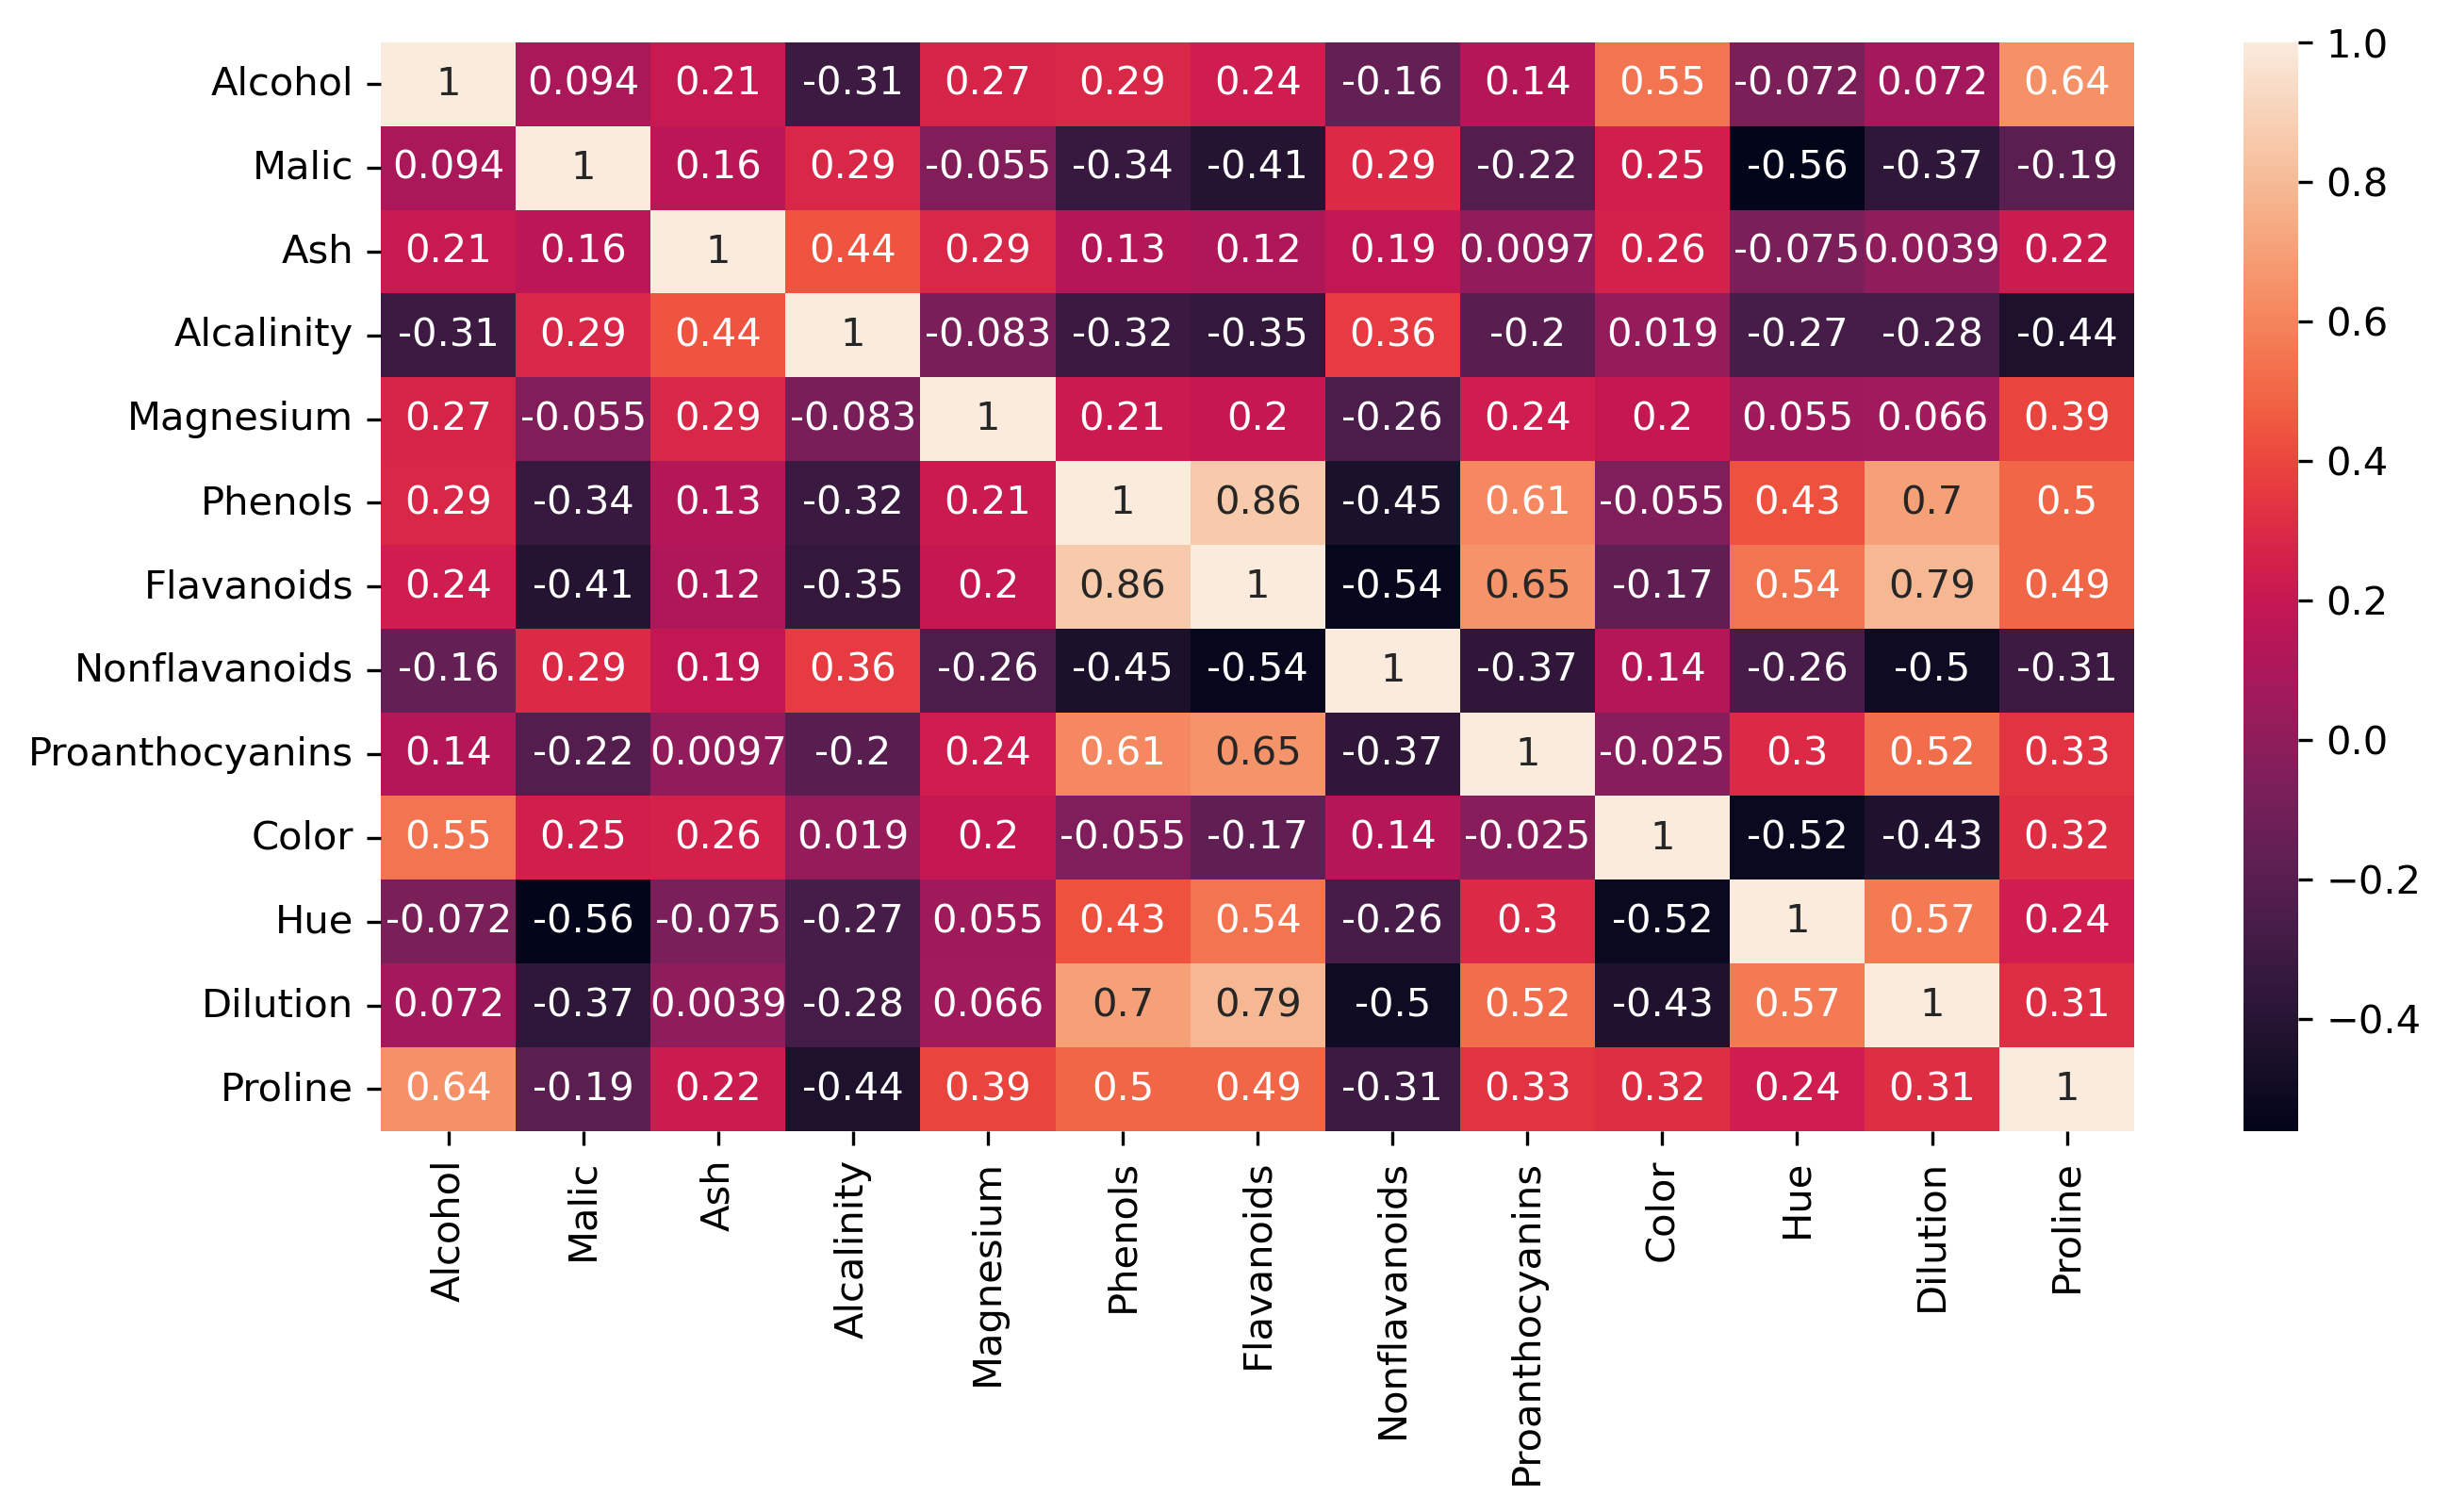

In [7]:
sns.heatmap(x.corr(),annot=True)

In [8]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
pca = PCA()
pcs = pca.fit_transform(x)
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [12]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [13]:
data = pd.DataFrame(pcs, columns=['pc1','pc2','pc3'])
data['Class'] = y

In [14]:
data

pc1       pc2       pc3  Class
0    3.316751 -1.443463 -0.165739      1
1    2.209465  0.333393 -2.026457      1
2    2.516740 -1.031151  0.982819      1
3    3.757066 -2.756372 -0.176192      1
4    1.008908 -0.869831  2.026688      1
..        ...       ...       ...    ...
173 -3.370524 -2.216289 -0.342570      3
174 -2.601956 -1.757229  0.207581      3
175 -2.677839 -2.760899 -0.940942      3
176 -2.387017 -2.297347 -0.550696      3
177 -3.208758 -2.768920  1.013914      3

[178 rows x 4 columns]

<Axes: >

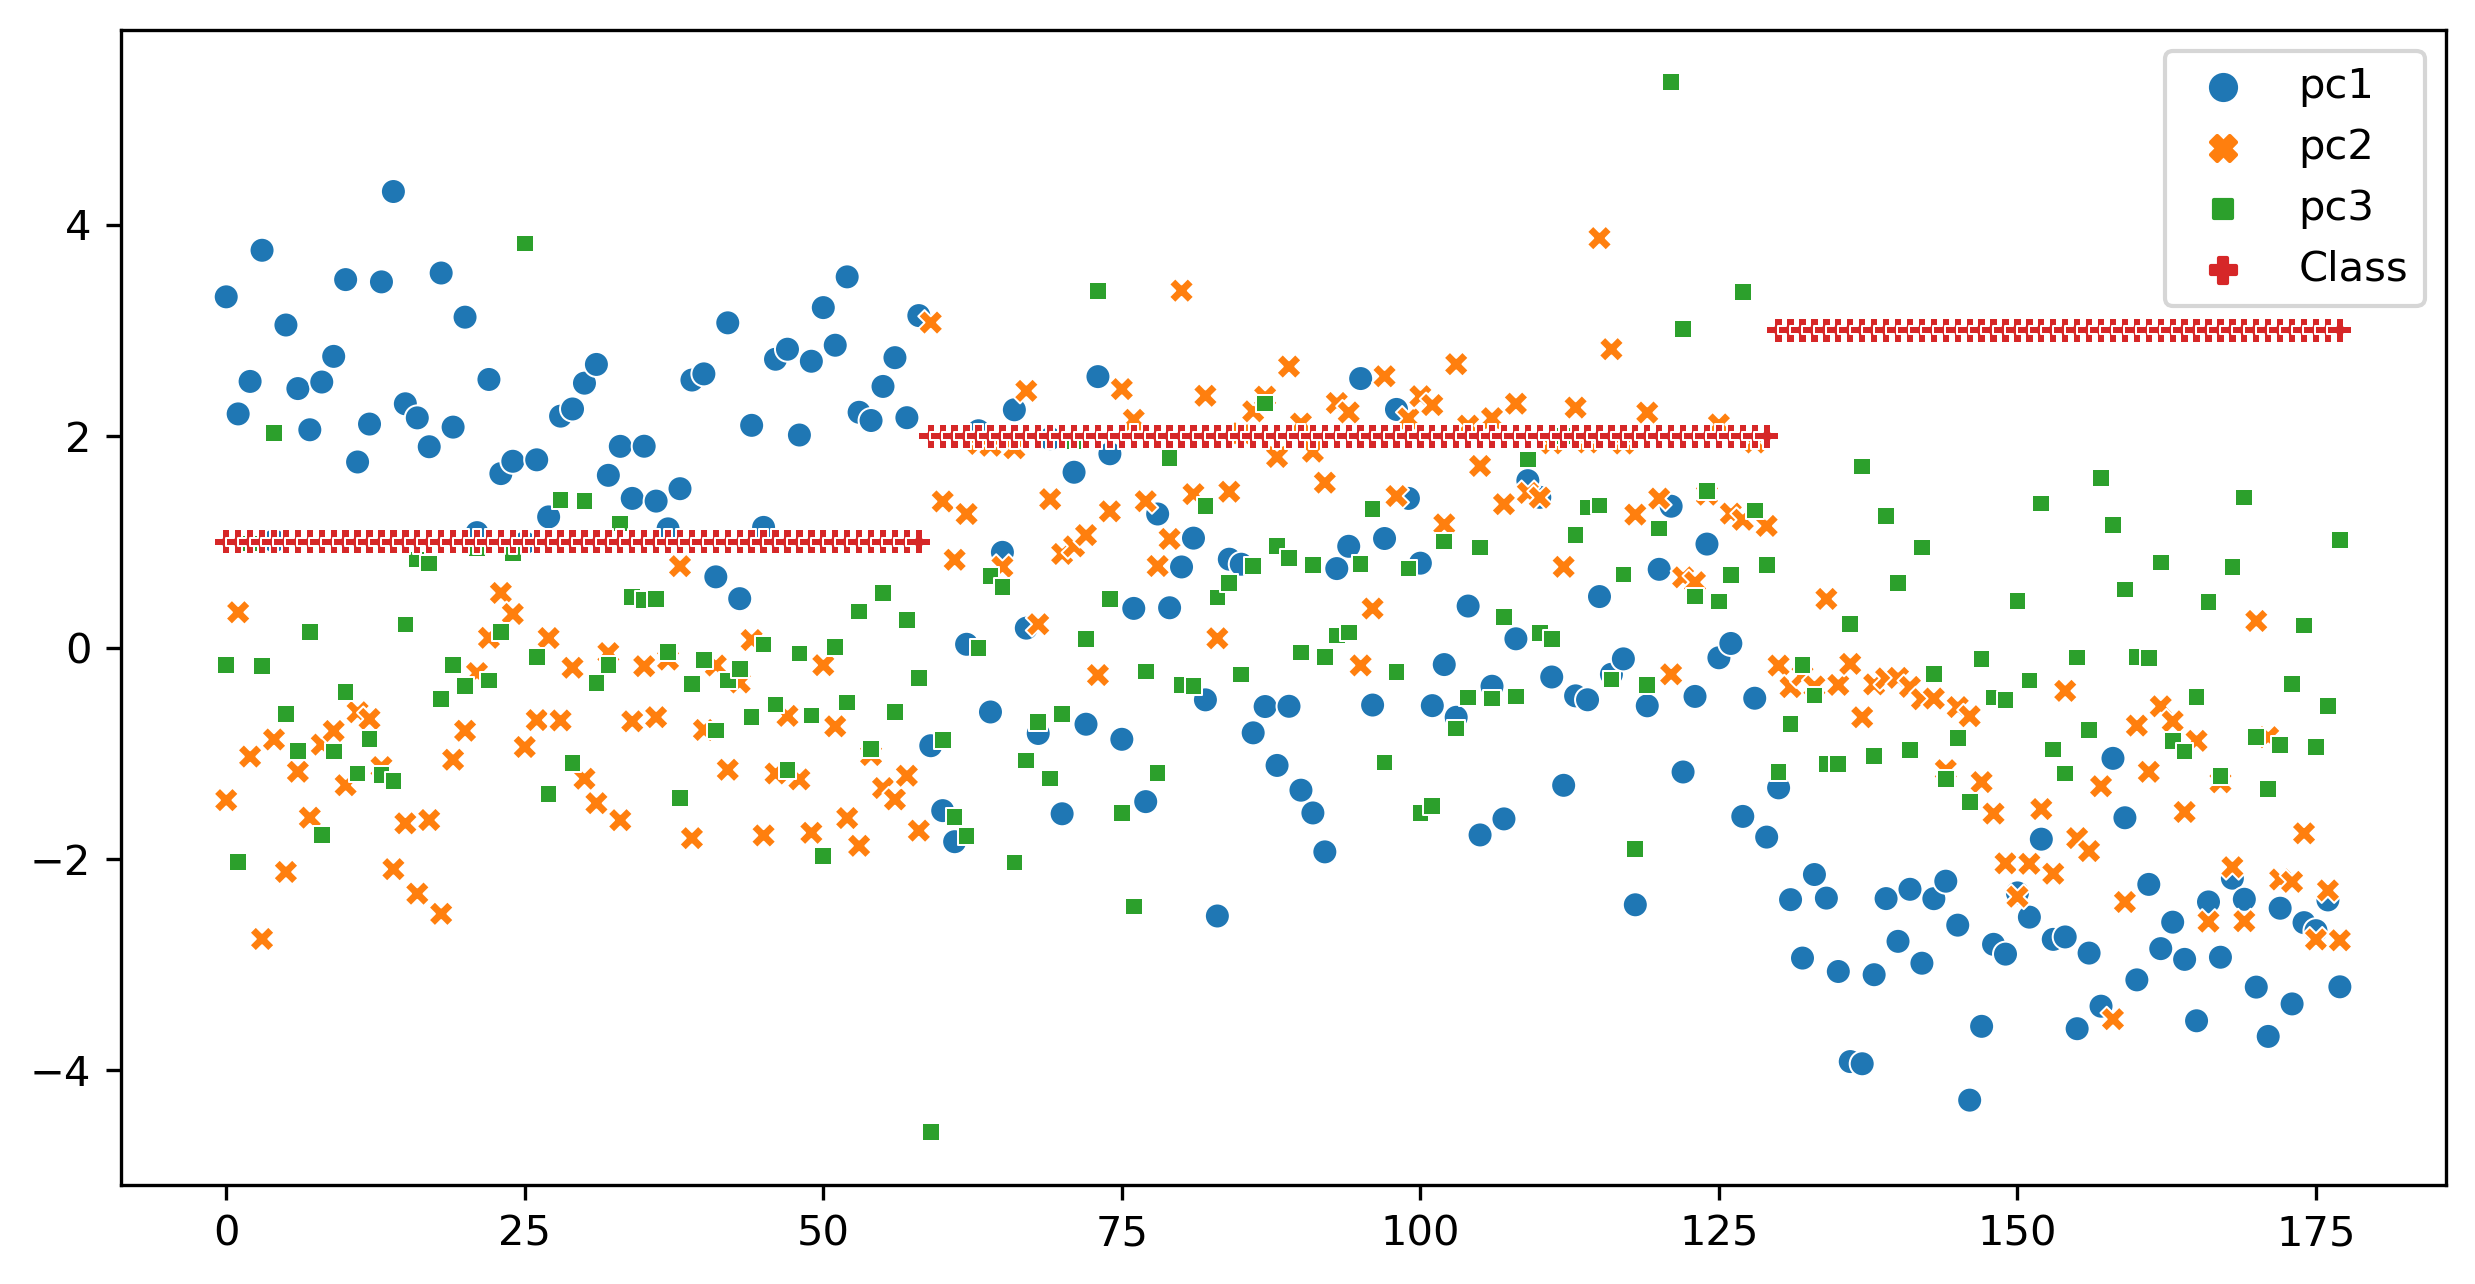

In [15]:
sns.scatterplot(data = data)

Checking With Other Clustering Algorithms:

In [16]:
# Hierarchical Clustering
from scipy.cluster import hierarchy

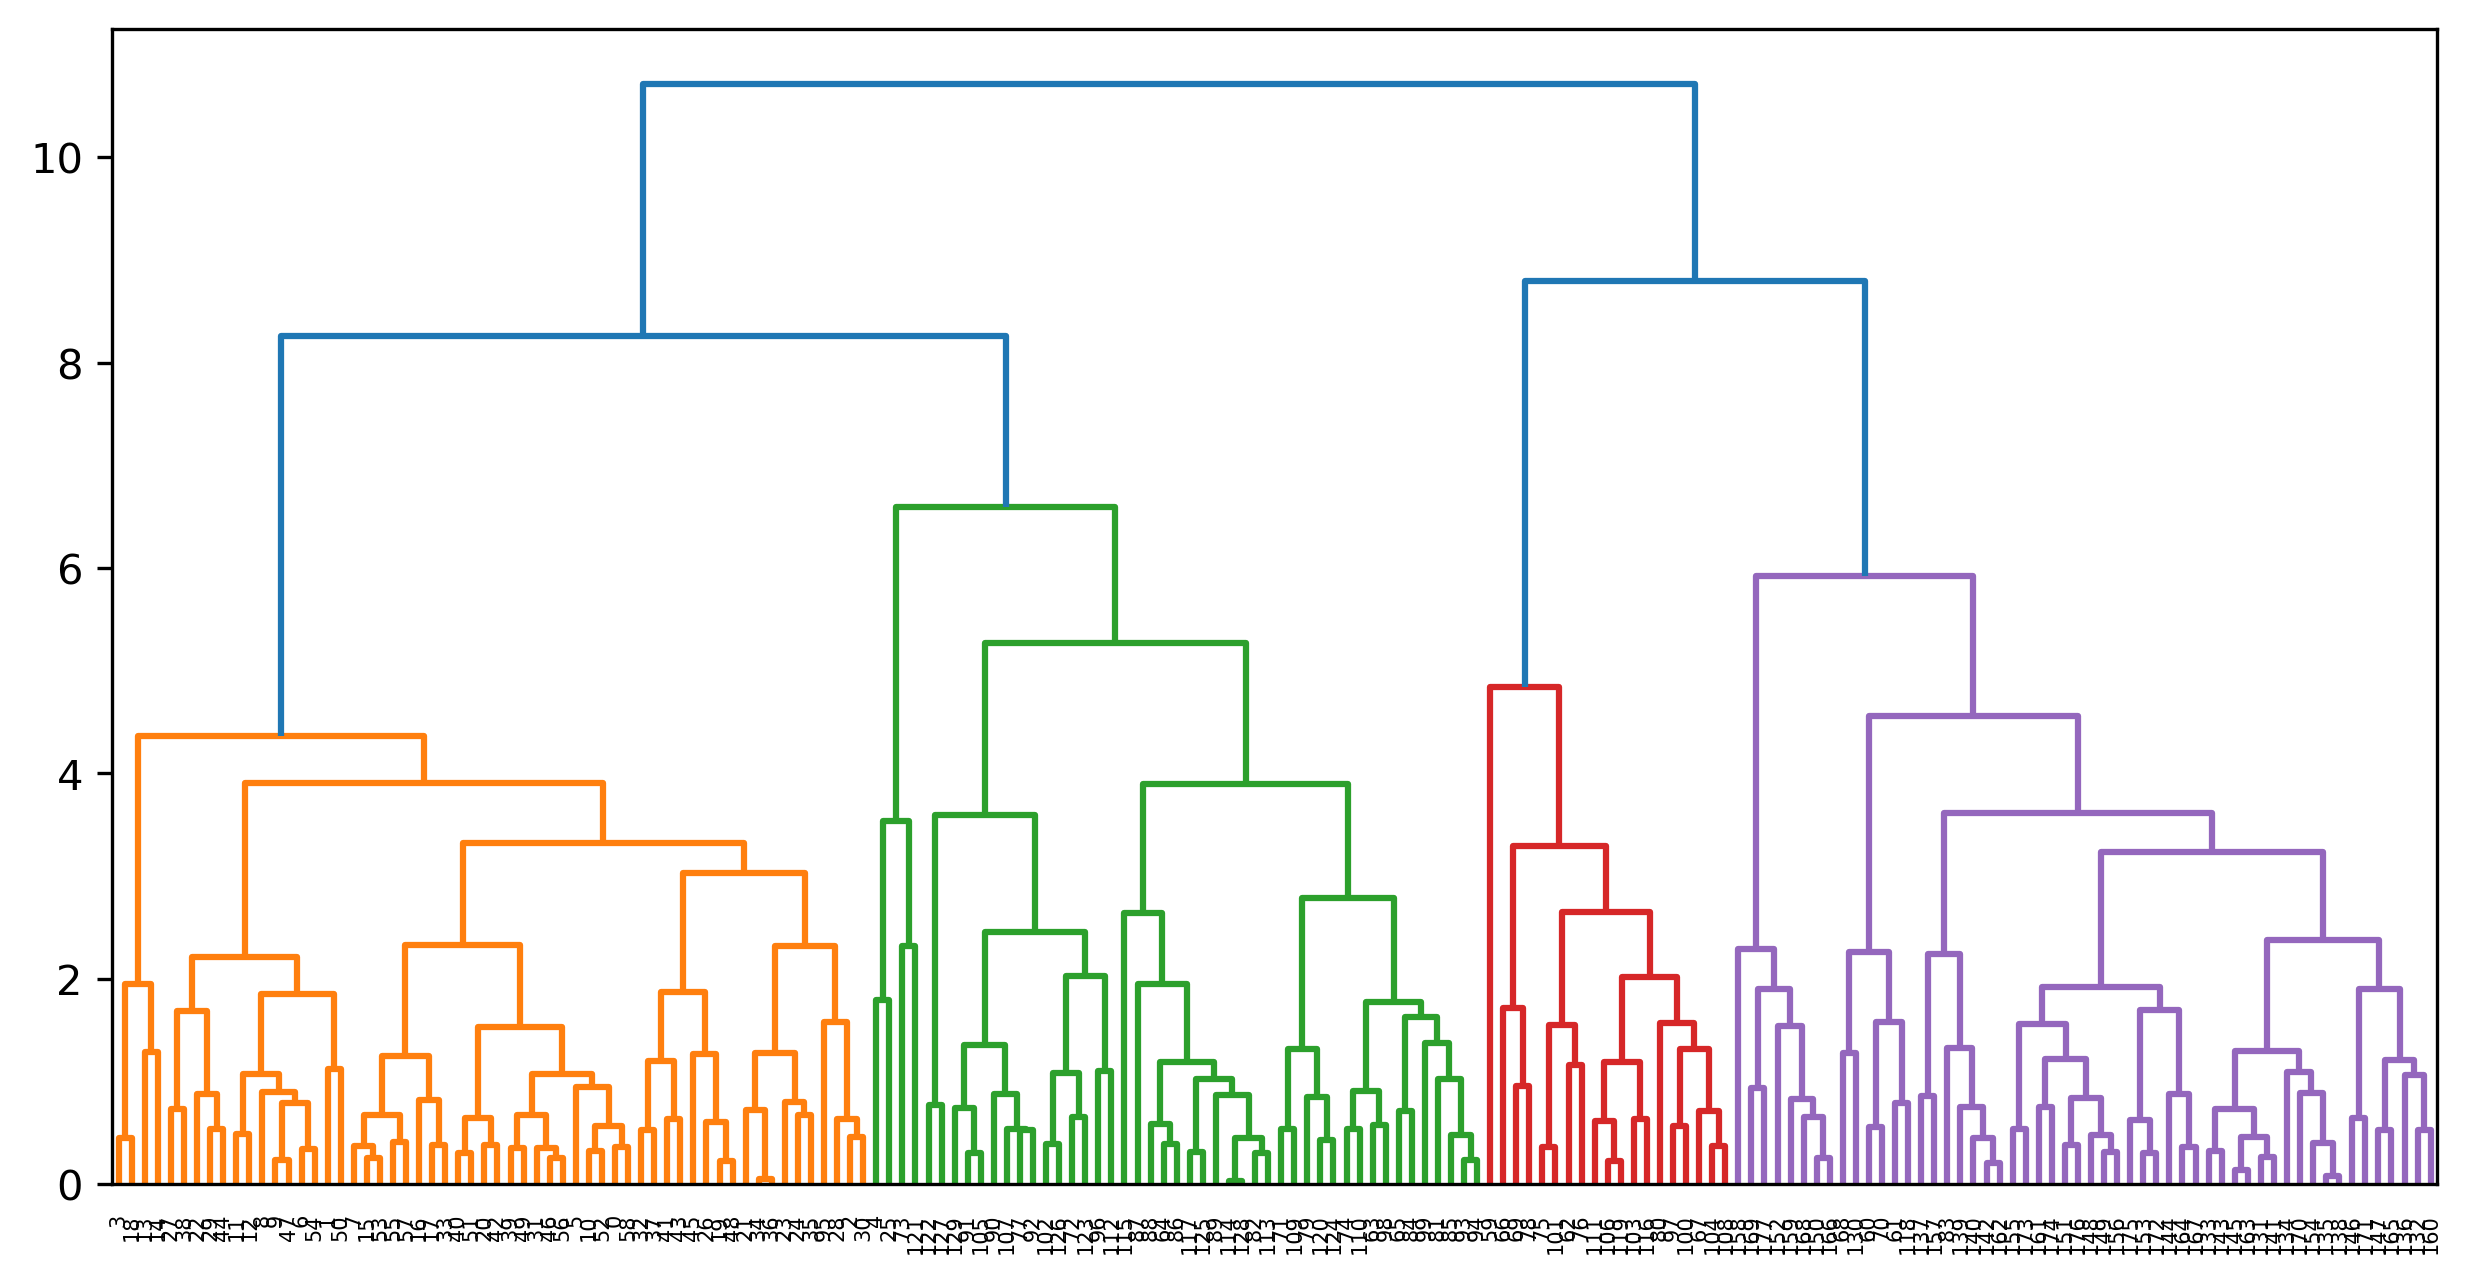

In [17]:
lk = hierarchy.linkage(data,method = 'complete')
dendrogram = hierarchy.dendrogram(lk)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc = AgglomerativeClustering(n_clusters=3)
ypred = hc.fit_predict(data)

In [20]:
data['cluster_hm'] = ypred

In [21]:
data

pc1       pc2       pc3  Class  cluster_hm
0    3.316751 -1.443463 -0.165739      1           2
1    2.209465  0.333393 -2.026457      1           2
2    2.516740 -1.031151  0.982819      1           2
3    3.757066 -2.756372 -0.176192      1           2
4    1.008908 -0.869831  2.026688      1           2
..        ...       ...       ...    ...         ...
173 -3.370524 -2.216289 -0.342570      3           1
174 -2.601956 -1.757229  0.207581      3           1
175 -2.677839 -2.760899 -0.940942      3           1
176 -2.387017 -2.297347 -0.550696      3           1
177 -3.208758 -2.768920  1.013914      3           1

[178 rows x 5 columns]

In [22]:
data.groupby('cluster_hm').agg(['mean'])

pc1       pc2       pc3     Class
                mean      mean      mean      mean
cluster_hm                                        
0          -0.117626  1.722240  0.108975  2.014706
1          -2.773447 -1.235936 -0.156354  2.979167
2           2.276194 -0.932054  0.001528  1.048387

In [23]:
data['cluster_hm'].value_counts()

0    68
2    62
1    48
Name: cluster_hm, dtype: int64

In [25]:
# KMeans Clustering
from sklearn.cluster import KMeans

In [26]:
wcss = []


for i in range(1,8):
    km = KMeans(n_clusters = i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
    

In [27]:
wcss

[1775.6214577163962,
 1005.3810166387723,
 519.4568027352187,
 444.8583422421388,
 387.093081120961,
 343.1790324654479,
 307.52106025192614]

Text(0.5, 1.0, 'Elbow Graph')

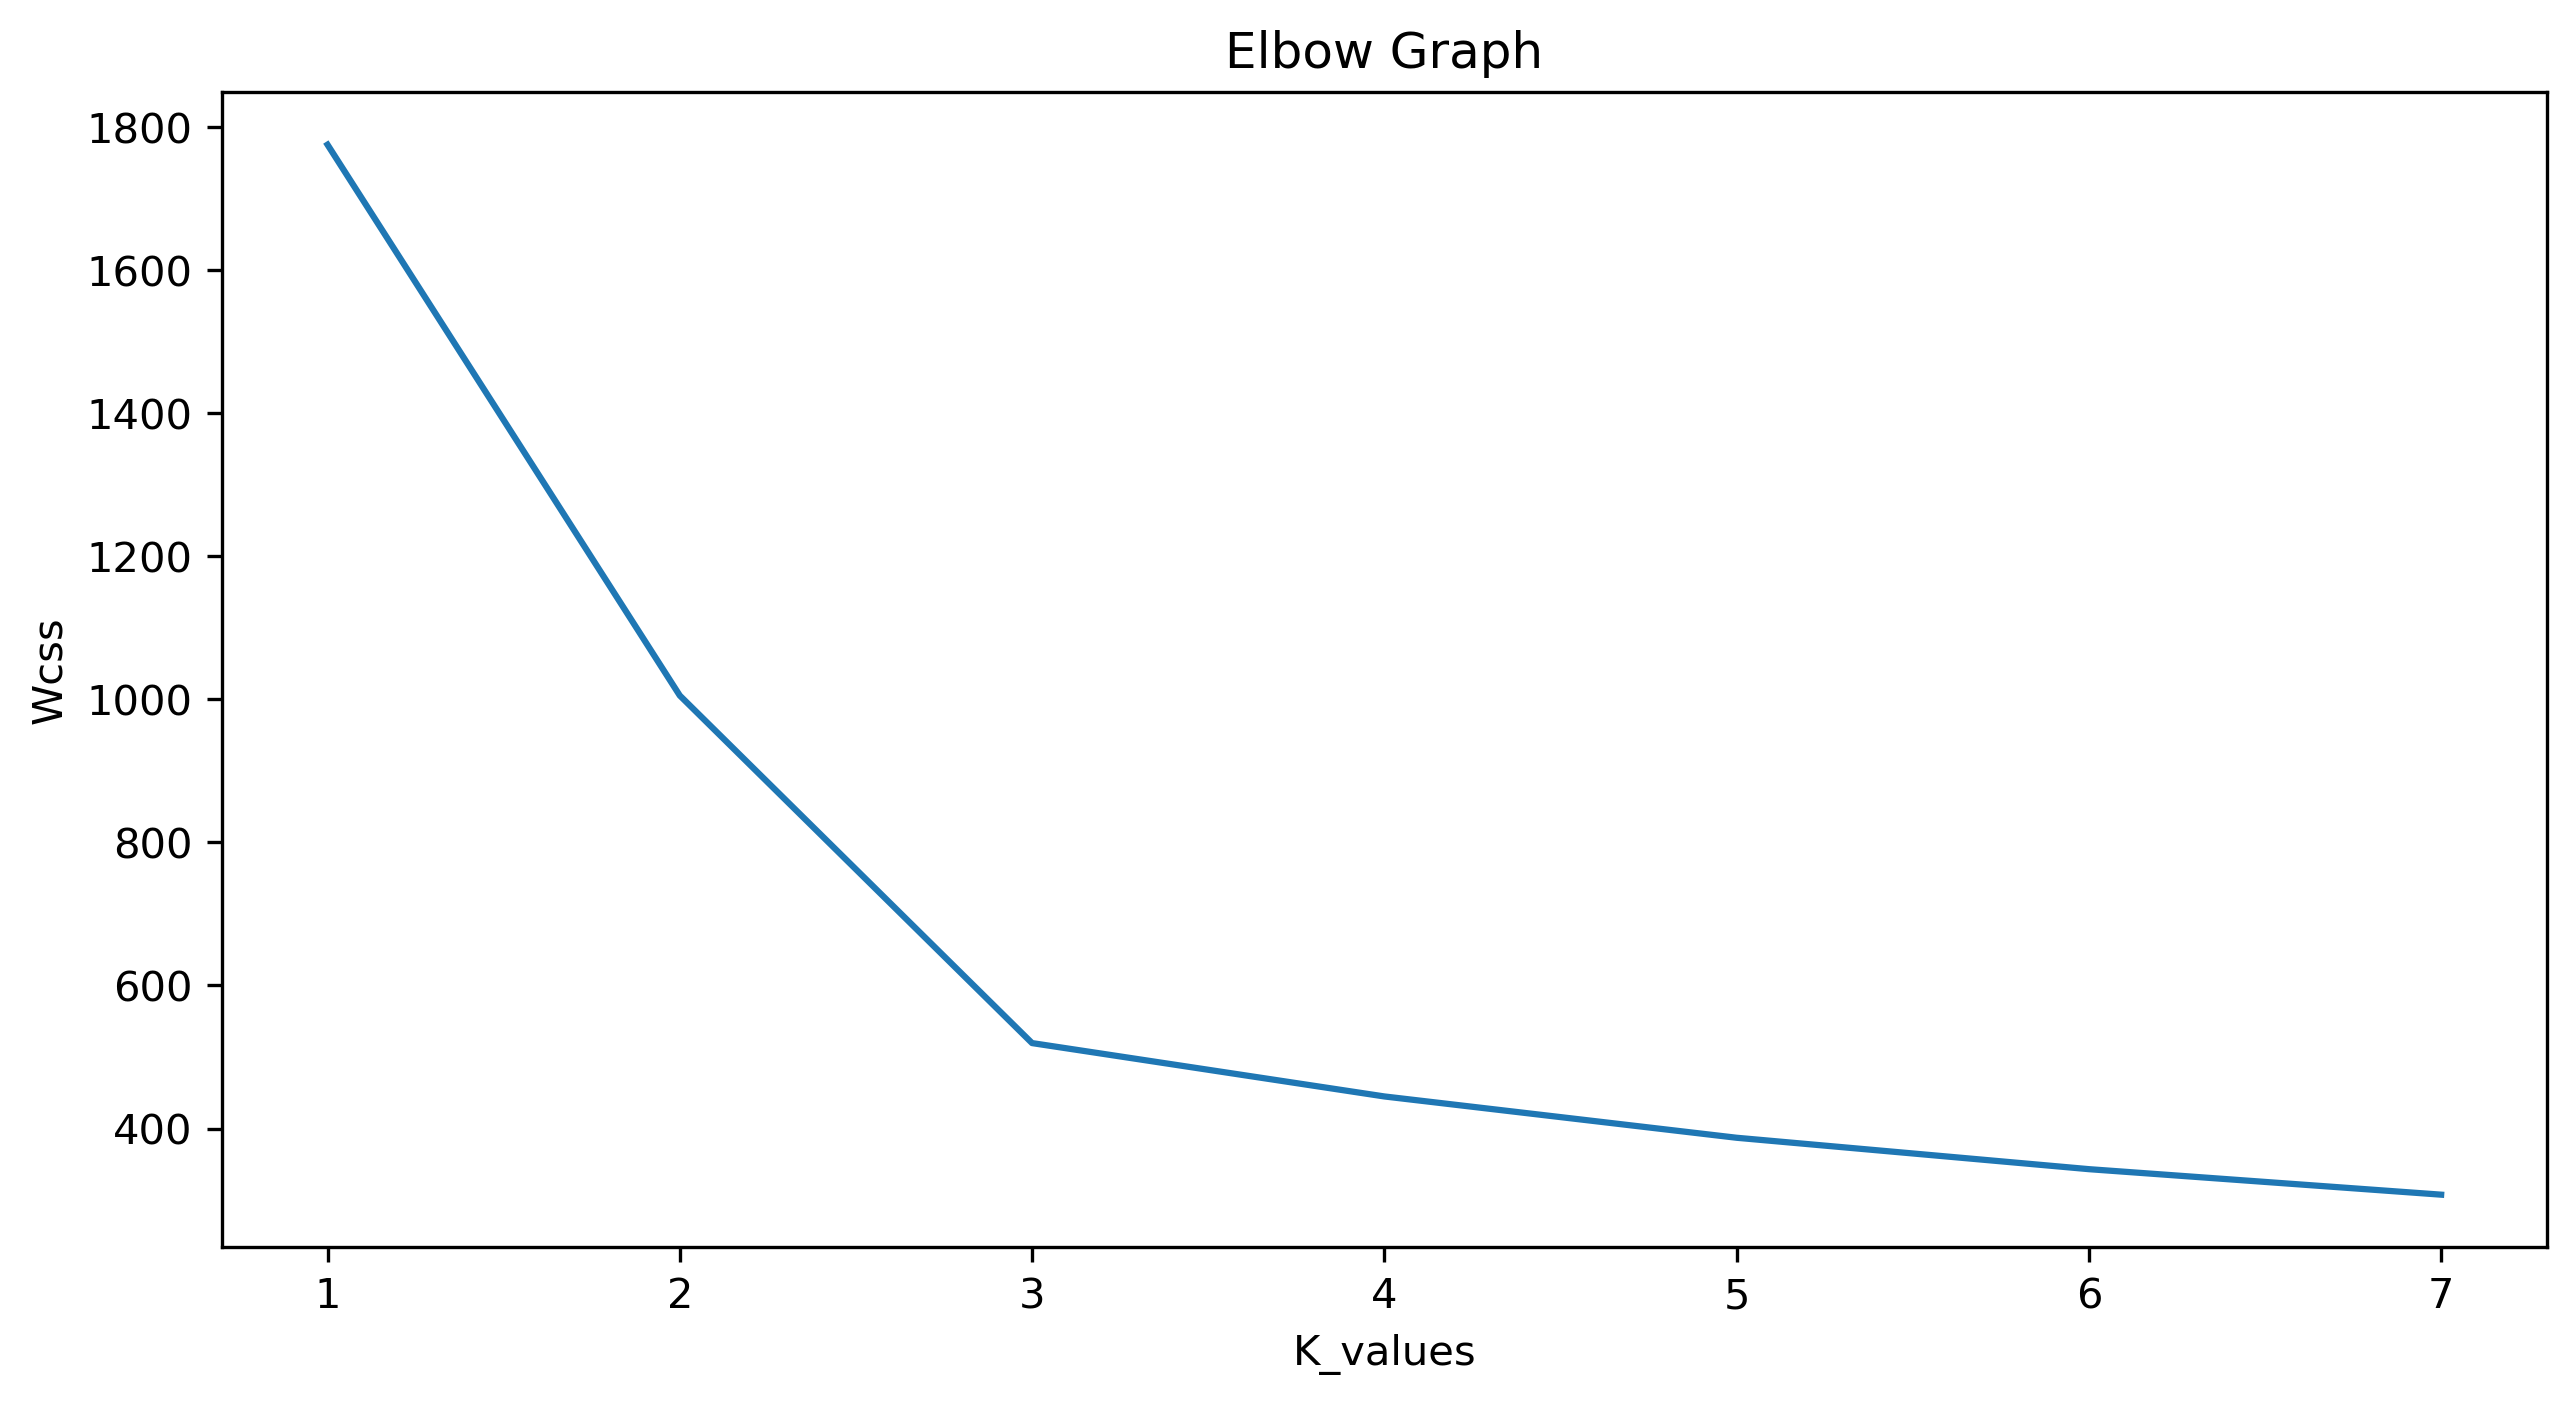

In [30]:
plt.plot(range(1,8),wcss)
#plt.axvline(data=3,linestyle='--',color='red')
plt.xlabel('K_values')
plt.ylabel('Wcss')
plt.title('Elbow Graph')

In [31]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [32]:
data['cluster_km'] = ypred
data

pc1       pc2       pc3  Class  cluster_hm  cluster_km
0    3.316751 -1.443463 -0.165739      1           2           2
1    2.209465  0.333393 -2.026457      1           2           2
2    2.516740 -1.031151  0.982819      1           2           2
3    3.757066 -2.756372 -0.176192      1           2           2
4    1.008908 -0.869831  2.026688      1           2           2
..        ...       ...       ...    ...         ...         ...
173 -3.370524 -2.216289 -0.342570      3           1           0
174 -2.601956 -1.757229  0.207581      3           1           0
175 -2.677839 -2.760899 -0.940942      3           1           0
176 -2.387017 -2.297347 -0.550696      3           1           0
177 -3.208758 -2.768920  1.013914      3           1           0

[178 rows x 6 columns]

In [33]:
data.groupby('cluster_km').agg('mean')

pc1       pc2       pc3     Class  cluster_hm
cluster_km                                                    
0          -2.720036 -1.125651 -0.239093  2.941176    0.941176
1          -0.036957  1.772239  0.186139  2.000000    0.000000
2           2.276194 -0.932054  0.001528  1.048387    2.000000

In [34]:
data['cluster_km'].value_counts()

1    65
2    62
0    51
Name: cluster_km, dtype: int64

# TSNE (Data Visualization):

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=2)
ts = tsne.fit_transform(data)

ts

array([[-2.67436695e+01,  4.66087535e-02],
       [-2.51384792e+01,  4.14253139e+00],
       [-2.24226971e+01, -7.39611387e-01],
       [-2.76296730e+01, -1.22861612e+00],
       [-2.08137608e+01, -5.94166338e-01],
       [-2.67817612e+01, -8.68378699e-01],
       [-2.57938290e+01,  1.73050177e+00],
       [-2.41461639e+01, -5.68982959e-01],
       [-2.61753597e+01,  2.99973392e+00],
       [-2.61126404e+01,  2.02447319e+00],
       [-2.70758114e+01,  4.73947465e-01],
       [-2.48096199e+01,  3.12720108e+00],
       [-2.49538059e+01,  2.42170978e+00],
       [-2.72538605e+01,  1.41162431e+00],
       [-2.81792526e+01, -2.23171890e-01],
       [-2.44209099e+01, -8.02674472e-01],
       [-2.36250648e+01, -1.82071209e+00],
       [-2.31395130e+01, -1.11794746e+00],
       [-2.75218487e+01, -9.70172107e-01],
       [-2.41389980e+01,  6.98065698e-01],
       [-2.62745056e+01,  1.08824015e+00],
       [-2.14834290e+01,  1.31977820e+00],
       [-2.39211330e+01,  2.42918396e+00],
       [-2.

In [39]:
import plotly.express as pe

In [40]:
pe.scatter(x = ts[:,0],y = ts[:,1],color = y)